In [1]:
# Import the tools we are going to need today:
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

# Import file libraries
import os
#import datetime as dt
#import scipy.io
import glob

# Plotting
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt  # plotting library
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy.feature as cft

# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size


# 
from datetime import datetime
import xesmf as xe
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import argparse
import os
import numpy             as np
import xarray            as xr
import pandas as pd
import json
import pdb
import logging
import metpy.calc        as mpc
from datetime            import datetime, timedelta
from dask.diagnostics    import ProgressBar

# JRA55-do 1.4.0 climatology

## 1980s

In [101]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/'
years = 198
onlyfiles = glob.glob("{path}/JRA55_03hr_forcing_*{years}*".format(path=mypath, years=years))
onlyfiles.sort()
filename = onlyfiles[0]
print(filename)
ds = xr.open_dataset(filename)
ds

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1980.nc


<xarray.Dataset>
Dimensions:  (time: 2928, nj: 300, ni: 360)
Coordinates:
    LON      (nj, ni) float32 ...
    LAT      (nj, ni) float32 ...
  * time     (time) datetime64[ns] 1980-01-01T01:30:00 ... 1980-12-31T22:30:00
Dimensions without coordinates: nj, ni
Data variables:
    airtmp   (time, nj, ni) float32 ...
    dlwsfc   (time, nj, ni) float32 ...
    glbrad   (time, nj, ni) float32 ...
    spchmd   (time, nj, ni) float32 ...
    ttlpcp   (time, nj, ni) float32 ...
    wndewd   (time, nj, ni) float32 ...
    wndnwd   (time, nj, ni) float32 ...
Attributes:
    creation_date:  2023-03-06 22
    conventions:    CCSM data model domain description -- for CICE6 standalon...
    title:          re-gridded JRA55 for CICE6 standalone atmospheric forcing
    source:         JRA55-do 1.4.0, https://doi.org/10.1016/j.ocemod.2018.07....
    comment:        source files found on gadi, /g/data/qv56/inputs
    author:         Noah Day
    email:          noah.day@adelaide.edu.au

In [ ]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)

airtmp_array = np.empty(ds['airtmp'].shape)
dlwsfc_array = np.empty(ds['airtmp'].shape)
glbrad_array = np.empty(ds['airtmp'].shape)
spchmd_array = np.empty(ds['airtmp'].shape)
ttlpcp_array = np.empty(ds['airtmp'].shape)
wndewd_array = np.empty(ds['airtmp'].shape)
wndnwd_array = np.empty(ds['airtmp'].shape)

for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,2920):
        airtmp_array[time_lp,:,:] += weighting*ds_temp['airtmp'][time_lp,:,:].data
        dlwsfc_array[time_lp,:,:] += weighting*ds_temp['dlwsfc'][time_lp,:,:].data
        glbrad_array[time_lp,:,:] += weighting*ds_temp['glbrad'][time_lp,:,:].data
        spchmd_array[time_lp,:,:] += weighting*ds_temp['spchmd'][time_lp,:,:].data
        ttlpcp_array[time_lp,:,:] += weighting*ds_temp['ttlpcp'][time_lp,:,:].data
        wndewd_array[time_lp,:,:] += weighting*ds_temp['wndewd'][time_lp,:,:].data
        wndnwd_array[time_lp,:,:] += weighting*ds_temp['wndnwd'][time_lp,:,:].data

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1980.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1981.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1982.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1983.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1984.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_1985.nc


In [89]:
#print(ds_temp['airtmp'][time_lp,:,:].data)

#print(ds_temp['dlwsfc'][time_lp,:,:].data)

print(climatology_xarray['airtmp'][time_lp,:,:].data)
init_array += ds_temp['dlwsfc'][time_lp,:,:].data
print(init_array)

#print(climatology_xarray['dlwsfc'][time_lp,:,:].data)

[[3551.04905988 3568.13259673 3585.92423854 ... 3501.99157929
  3518.44720928 3534.94792153]
 [3554.55174326 3572.16322451 3590.54209788 ... 3503.67632125
  3520.55897429 3537.87506056]
 [3558.98886236 3576.8874945  3595.61784866 ... 3506.57965644
  3524.07335206 3542.04180344]
 ...
 [1907.00913306 1888.5307324  1863.8311494  ... 1854.32304385
  1886.14387464 1907.14159108]
 [1907.02289788 1887.96576567 1861.93628313 ... 1856.44863538
  1886.57925058 1907.10195713]
 [1907.04292201 1887.4492972  1860.08068463 ... 1858.26134654
  1886.98509198 1907.06925102]]
[[333.80554 330.4406  329.78308 ... 342.30392 341.6987  339.92026]
 [336.80267 332.68448 331.83527 ... 346.15204 345.4029  343.77032]
 [339.60046 335.15256 334.24655 ... 349.8946  348.9804  347.14676]
 ...
 [659.4732  657.505   661.5211  ... 652.087   653.4508  658.5571 ]
 [659.2808  656.7065  659.72345 ... 654.225   654.2838  658.73065]
 [659.0931  655.9016  657.91785 ... 656.0935  655.0921  658.9093 ]]


In [93]:
# Write to a file
filename_write=mypath+"JRA55_03hr_clim_1980.nc"

d_vars = {"airtmp" : (['time','nj','ni'],airtmp_array,
                              {'long_name' :"2 metre temperature",
                               'units'     :"Kelvin",
                               '_FillValue':-2e8}), 
          "dlwsfc" : (['time','nj','ni'],dlwsfc_array,
                      {'long_name':"Mean surface downward long-wave radiation flux",
                       'units'    :"W m**-2",
                       '_FillValue':-2e8}),
          "glbrad" : (['time','nj','ni'],glbrad_array,
                      {'long_name':"Mean surface downward short-wave radiation flux",
                       'units'    :"W m**-2",
                       '_FillValue':-2e8}),
          "spchmd" : (['time','nj','ni'],spchmd_array,
                      {'long_name':"specific humidity",
                       'units'    :"kg/kg",
                       '_FillValue':-2e8}),
          "ttlpcp" : (['time','nj','ni'],ttlpcp_array,
                      {'long_name':"Mean total precipitation rate",
                       'units'    :"kg m**-2 s**-1",
                       '_FillValue':-2e8}),
          "wndewd" : (['time','nj','ni'],wndewd_array,
                      {'long_name':"10 metre meridional wind component",
                       'units'    :"m s**-1",
                       '_FillValue':-2e8}),
          "wndnwd" : (['time','nj','ni'],wndnwd_array,
                      {'long_name':"10 metre zonal wind component",
                       'units'    :"m s**-1",
                       '_FillValue':-2e8}) }
coords = {"LON"  : (["nj","ni"],ds['LON'].data,{'units':'degrees_east'}),
          "LAT"  : (["nj","ni"],ds['LAT'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6 standalone 'JRA55' atmosphere option",
         'title'        : "re-gridded JRA55 for CICE6 standalone atmospheric climatology",
         'source'       : "JRA55-do 1.4.0, https://doi.org/10.1016/j.ocemod.2018.07.002, ",
         'comment'      : "source files found on gadi, /g/data/qv56/inputs",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)


First row done


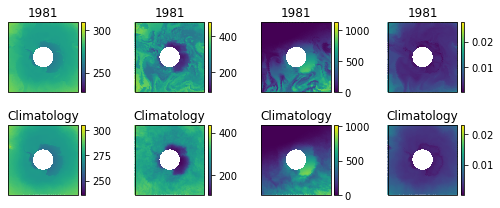

In [94]:
# Plot this on a map 
ds = xr.open_dataset('/g/data/ia40/cice-dirs/runs/waves-10/history/iceh.2000-01-01.nc')
LT = ds['TLAT'].data
LN = ds['TLON'].data

day_idx = 0

fontprops = fm.FontProperties(size=18)
plt.figure()
plt.rcParams['figure.figsize'] = (12, 3)  # Default plot size


clevs=np.arange(0,4,1)

coord_lims = [-180, 180, -50, -90]

# First pane
filename_read=mypath+"JRA55_03hr_forcing_1981.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['airtmp'][day_idx,:,:]
ax = plt.subplot(2, 7, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['dlwsfc'][day_idx,:,:]
ax = plt.subplot(2, 7, 2, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['glbrad'][day_idx,:,:]
ax = plt.subplot(2, 7, 3, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['spchmd'][day_idx,:,:]
ax = plt.subplot(2, 7, 4, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['ttlpcp'][day_idx,:,:]
# ax = plt.subplot(2, 7, 5, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("1981")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['wndewd'][day_idx,:,:]
# ax = plt.subplot(2, 7, 6, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("1981")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['wndnwd'][day_idx,:,:]
# ax = plt.subplot(2, 7, 7, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("1981")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

print("First row done")
# Second row
filename_read=mypath+"JRA55_03hr_clim_1980.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['airtmp'][day_idx,:,:]
#ds['airtmp'][180,:,:]
ax = plt.subplot(2, 7, 8, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['dlwsfc'][day_idx,:,:]
ax = plt.subplot(2, 7, 9, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['glbrad'][day_idx,:,:]
ax = plt.subplot(2, 7, 10, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['spchmd'][day_idx,:,:]
ax = plt.subplot(2, 7, 11, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 


savepath = '/home/566/nd0349/notebooks/'
plt.tight_layout()
#plt.savefig(savepath+'kmeans_map_day_200_'+str(year)+'.png', dpi = 300) 

## 2010s

In [22]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/'
years = 201
onlyfiles = glob.glob("{path}/JRA55_03hr_forcing_*{years}*".format(path=mypath, years=years))
#onlyfiles[-1] = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
onlyfiles.sort()
onlyfiles[-1] = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'
filename = onlyfiles[-1]
print(filename)
ds = xr.open_dataset(filename)
ds

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc


<xarray.Dataset>
Dimensions:  (time: 2920, nj: 300, ni: 360)
Coordinates:
    LON      (nj, ni) float32 ...
    LAT      (nj, ni) float32 ...
  * time     (time) datetime64[ns] 2019-01-01T01:30:00 ... 2019-12-31T22:30:00
Dimensions without coordinates: nj, ni
Data variables:
    airtmp   (time, nj, ni) float32 ...
    dlwsfc   (time, nj, ni) float32 ...
    glbrad   (time, nj, ni) float32 ...
    spchmd   (time, nj, ni) float32 ...
    ttlpcp   (time, nj, ni) float32 ...
    wndewd   (time, nj, ni) float32 ...
    wndnwd   (time, nj, ni) float32 ...
Attributes:
    creation_date:  2023-04-11 21
    conventions:    CCSM data model domain description -- for CICE6 standalon...
    title:          re-gridded JRA55 for CICE6 standalone atmospheric forcing
    source:         JRA55-do 1.4.0, https://doi.org/10.1016/j.ocemod.2018.07....
    comment:        source files found on gadi, /g/data/qv56/inputs
    author:         Noah Day
    email:          noah.day@adelaide.edu.au

In [23]:
#onlyfiles[-1] = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-5-0/8XDAILY/JRA55_03hr_forcing_2019.nc'

onlyfiles

['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2010.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2011.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2012.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2013.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2014.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2015.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2016.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2017.nc',
 '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8X

In [8]:
#ds_temp['airtmp'][:,:,:].data.shape
#time_lp
filename

'/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2019.nc'

In [ ]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)

airtmp_array = np.empty(ds['airtmp'].shape)
dlwsfc_array = np.empty(ds['airtmp'].shape)
glbrad_array = np.empty(ds['airtmp'].shape)
spchmd_array = np.empty(ds['airtmp'].shape)
ttlpcp_array = np.empty(ds['airtmp'].shape)
wndewd_array = np.empty(ds['airtmp'].shape)
wndnwd_array = np.empty(ds['airtmp'].shape)

for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,2920):
        airtmp_array[time_lp,:,:] += weighting*ds_temp['airtmp'][time_lp,:,:].data
        dlwsfc_array[time_lp,:,:] += weighting*ds_temp['dlwsfc'][time_lp,:,:].data
        glbrad_array[time_lp,:,:] += weighting*ds_temp['glbrad'][time_lp,:,:].data
        spchmd_array[time_lp,:,:] += weighting*ds_temp['spchmd'][time_lp,:,:].data
        ttlpcp_array[time_lp,:,:] += weighting*ds_temp['ttlpcp'][time_lp,:,:].data
        wndewd_array[time_lp,:,:] += weighting*ds_temp['wndewd'][time_lp,:,:].data
        wndnwd_array[time_lp,:,:] += weighting*ds_temp['wndnwd'][time_lp,:,:].data

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2010.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2011.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2012.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2013.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2014.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2015.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2016.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2017.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/JRA55-do/1-4-0/8XDAILY/JRA55_03hr_forcing_2018.nc
/

In [5]:
# Write to a file
filename_write=mypath+"JRA55_03hr_clim_2010.nc"

d_vars = {"airtmp" : (['time','nj','ni'],airtmp_array,
                              {'long_name' :"2 metre temperature",
                               'units'     :"Kelvin",
                               '_FillValue':-2e8}), 
          "dlwsfc" : (['time','nj','ni'],dlwsfc_array,
                      {'long_name':"Mean surface downward long-wave radiation flux",
                       'units'    :"W m**-2",
                       '_FillValue':-2e8}),
          "glbrad" : (['time','nj','ni'],glbrad_array,
                      {'long_name':"Mean surface downward short-wave radiation flux",
                       'units'    :"W m**-2",
                       '_FillValue':-2e8}),
          "spchmd" : (['time','nj','ni'],spchmd_array,
                      {'long_name':"specific humidity",
                       'units'    :"kg/kg",
                       '_FillValue':-2e8}),
          "ttlpcp" : (['time','nj','ni'],ttlpcp_array,
                      {'long_name':"Mean total precipitation rate",
                       'units'    :"kg m**-2 s**-1",
                       '_FillValue':-2e8}),
          "wndewd" : (['time','nj','ni'],wndewd_array,
                      {'long_name':"10 metre meridional wind component",
                       'units'    :"m s**-1",
                       '_FillValue':-2e8}),
          "wndnwd" : (['time','nj','ni'],wndnwd_array,
                      {'long_name':"10 metre zonal wind component",
                       'units'    :"m s**-1",
                       '_FillValue':-2e8}) }
coords = {"LON"  : (["nj","ni"],ds['LON'].data,{'units':'degrees_east'}),
          "LAT"  : (["nj","ni"],ds['LAT'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6 standalone 'JRA55' atmosphere option",
         'title'        : "re-gridded JRA55 for CICE6 standalone atmospheric climatology",
         'source'       : "JRA55-do 1.4.0, https://doi.org/10.1016/j.ocemod.2018.07.002, ",
         'comment'      : "source files found on gadi, /g/data/qv56/inputs",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)


First row done


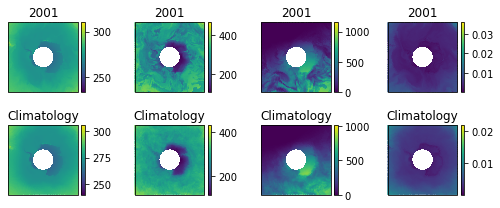

In [99]:
# Plot this on a map 
ds = xr.open_dataset('/g/data/ia40/cice-dirs/runs/waves-10/history/iceh.2000-01-01.nc')
LT = ds['TLAT'].data
LN = ds['TLON'].data

day_idx = 0

fontprops = fm.FontProperties(size=18)
plt.figure()
plt.rcParams['figure.figsize'] = (12, 3)  # Default plot size


clevs=np.arange(0,4,1)

coord_lims = [-180, 180, -50, -90]

# First pane
filename_read=mypath+"JRA55_03hr_forcing_2011.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['airtmp'][day_idx,:,:]
ax = plt.subplot(2, 7, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['dlwsfc'][day_idx,:,:]
ax = plt.subplot(2, 7, 2, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['glbrad'][day_idx,:,:]
ax = plt.subplot(2, 7, 3, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['spchmd'][day_idx,:,:]
ax = plt.subplot(2, 7, 4, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['ttlpcp'][day_idx,:,:]
# ax = plt.subplot(2, 7, 5, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("2001")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['wndewd'][day_idx,:,:]
# ax = plt.subplot(2, 7, 6, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("2001")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

# plot_data = ds['wndnwd'][day_idx,:,:]
# ax = plt.subplot(2, 7, 7, projection=ccrs.SouthPolarStereo())
# ax.set_extent(coord_lims, ccrs.PlateCarree())
# p = ax.pcolormesh(LN, LT, plot_data.data,
#                   transform=ccrs.PlateCarree(),
#                   shading='auto')
# plt.title("2001")
# cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

print("First row done")
# Second row
filename_read=mypath+"JRA55_03hr_clim_2010.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['airtmp'][day_idx,:,:]
#ds['airtmp'][180,:,:]
ax = plt.subplot(2, 7, 8, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['dlwsfc'][day_idx,:,:]
ax = plt.subplot(2, 7, 9, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['glbrad'][day_idx,:,:]
ax = plt.subplot(2, 7, 10, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['spchmd'][day_idx,:,:]
ax = plt.subplot(2, 7, 11, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 


savepath = '/home/566/nd0349/notebooks/'
plt.tight_layout()
#plt.savefig(savepath+'kmeans_map_day_200_'+str(year)+'.png', dpi = 300) 

# ACCESS-OM2 data ocean

## 1980

In [5]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/'
years = 198
onlyfiles = glob.glob("{path}/output*{years}*".format(path=mypath, years=years))
onlyfiles.sort()
filename = onlyfiles[1]
print(filename)
ds = xr.open_dataset(filename)
ds

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1981.nc


<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, xt_ocean: 360, yt_ocean: 300, xu_ocean: 360,
                yu_ocean: 300)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-14T12:00:00 ... 1981-12-14T12:00:00
  * xt_ocean   (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean   (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * xu_ocean   (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yu_ocean   (yu_ocean) float64 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    st_ocean   float64 ...
    sst        (time, yt_ocean, xt_ocean) float32 ...
    sss        (time, yt_ocean, xt_ocean) float32 ...
    u          (time, yu_ocean, xu_ocean) float32 ...
    v          (time, yu_ocean, xu_ocean) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    filename:     ocean_month.nc
    title:        ACCESS-OM2-BGC
    grid_type:    mosaic
    grid_tile:    1
    history:      Fri Mar  3 22:50:06 2023: ncwa -a st_ocean temp2.nc output1...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...

In [7]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)
sst_array = np.empty(ds['sst'].shape)
sss_array = np.empty(ds['sst'].shape)
u_array = np.empty(ds['sst'].shape)
v_array = np.empty(ds['sst'].shape)

for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,12):
        sst_array[time_lp,:,:] += weighting*ds_temp['sst'][time_lp,:,:]
        sss_array[time_lp,:,:] += weighting*ds_temp['sss'][time_lp,:,:]
        u_array[time_lp,:,:]   += weighting*ds_temp['u'][time_lp,:,:]
        v_array[time_lp,:,:]   += weighting*ds_temp['v'][time_lp,:,:]

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1980.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1981.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1982.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1983.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1984.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1985.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1986.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1987.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1988.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output1989.nc


In [ ]:
# filename = onlyfiles[1]
# print(filename)
# ds = xr.open_dataset(filename)
# ds

# init_array = np.empty(ds['sst'].shape)

# climatology_xarray = xr.Dataset(
#     data_vars=dict(
#         sst=(["time", "yt_ocean", "xt_ocean"], init_array), 
#         sss=(["time", "yt_ocean", "xt_ocean"], init_array), 
#         u=(["time", "yu_ocean", "xu_ocean"], init_array), 
#         v=(["time", "yu_ocean", "xu_ocean"], init_array), 
#     ),
#     coords=dict(
#         xt_ocean=(["xt_ocean"], ds['xt_ocean'].data),
#         yt_ocean=(["yt_ocean"], ds['yt_ocean'].data),
#         xu_ocean=(["xu_ocean"], ds['xu_ocean'].data),
#         yu_ocean=(["yu_ocean"], ds['yu_ocean'].data),
#         time=ds['time'].data,
# #        reference_time=reference_time,
#     ),
#     attrs=dict(description="Ocean climatology for the 1980s from ACCESS-OM2.",
#                comment="source files found on Gadi, /g/data/qv56/inputs.",
#                creation_date="2023-05-23",
#                author="Noah Day",
#                email="noah.day@adelaide.edu.au"
#               ),
# )

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2001.nc


In [12]:
# Write to a file
filename_write=mypath+"output_clim_1980.nc"

d_vars = {"sst" : (['time','yt_ocean','xt_ocean'],sst_array,
                              {'long_name' :"Potential temperature",
                               'units'     :"Kelvin",
                               '_FillValue':-2e8}), 
          "sss" : (['time','yt_ocean','xt_ocean'],sss_array,
                      {'long_name':"Practical salinity",
                       'units'    :"psu",
                       '_FillValue':-2e8}),
          "u" : (['time','yt_ocean','xt_ocean'],u_array,
                      {'long_name':"i-current",
                       'units'    :"m/s",
                       '_FillValue':-2e8}),
          "v" : (['time','yt_ocean','xt_ocean'],v_array,
                      {'long_name':"j-current",
                       'units'    :"m/s",
                       '_FillValue':-2e8}),
         }
coords = {"xt_ocean"  : (["xt_ocean"],ds['xt_ocean'].data,{'units':'degrees_east'}),
          "yt_ocean"  : (["yt_ocean"],ds['yt_ocean'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6 standalone 'ACCESS' ocean option",
         'title'        : "re-gridded ACCESS-OM2 output for CICE6 standalone ocean climatology",
         'source'       : "Kiss et al. (2020), https://doi.org/10.5194/gmd-13-401-2020, ",
         'comment'      : "source files found on gadi, /g/data/qv56/inputs",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)


First done


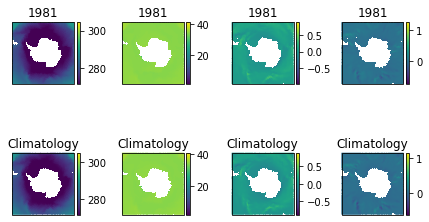

In [18]:
# Plot this on a map 
ds = xr.open_dataset('/g/data/ia40/cice-dirs/runs/waves-10/history/iceh.2000-01-01.nc')
LT = ds['TLAT'].data
LN = ds['TLON'].data

fontprops = fm.FontProperties(size=18)
plt.figure()
clevs=np.arange(0,4,1)

coord_lims = [-180, 180, -50, -90]

# First pane
filename_read=mypath+"output1981.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['sst'][6,:,:]
ax = plt.subplot(2, 4, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['sss'][6,:,:]
ax = plt.subplot(2, 4, 2, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['u'][6,:,:]
ax = plt.subplot(2, 4, 3, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['v'][6,:,:]
ax = plt.subplot(2, 4, 4, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("1981")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 



print("First done")
# Second pane
filename_read=mypath+"output_clim_1980.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['sst'][6,:,:]
ax = plt.subplot(2, 4, 5, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['sss'][6,:,:]
ax = plt.subplot(2, 4, 6, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['u'][6,:,:]
ax = plt.subplot(2, 4, 7, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['v'][6,:,:]
ax = plt.subplot(2, 4, 8, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 


savepath = '/home/566/nd0349/notebooks/'
plt.tight_layout()
#plt.savefig(savepath+'kmeans_map_day_200_'+str(year)+'.png', dpi = 300) 

## 2010s

In [2]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/'
years = 201
onlyfiles = glob.glob("{path}/output*{years}*".format(path=mypath, years=years))
onlyfiles.sort()
filename = onlyfiles[1]
print(filename)
ds = xr.open_dataset(filename)
ds

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2011.nc


<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, xt_ocean: 360, yt_ocean: 300, xu_ocean: 360,
                yu_ocean: 300)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-14T12:00:00 ... 2011-12-14T12:00:00
  * xt_ocean   (xt_ocean) float64 -279.5 -278.5 -277.5 -276.5 ... 77.5 78.5 79.5
  * yt_ocean   (yt_ocean) float64 -77.88 -77.63 -77.38 ... 88.87 89.32 89.77
  * xu_ocean   (xu_ocean) float64 -279.0 -278.0 -277.0 -276.0 ... 78.0 79.0 80.0
  * yu_ocean   (yu_ocean) float64 -77.75 -77.51 -77.26 ... 89.1 89.55 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    st_ocean   float64 ...
    sst        (time, yt_ocean, xt_ocean) float32 ...
    sss        (time, yt_ocean, xt_ocean) float32 ...
    u          (time, yu_ocean, xu_ocean) float32 ...
    v          (time, yu_ocean, xu_ocean) float32 ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    filename:     ocean_month.nc
    title:        ACCESS-OM2-BGC
    grid_type:    mosaic
    grid_tile:    1
    history:      Thu Feb 23 20:41:07 2023: ncwa -a st_ocean temp2.nc output2...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    NCO:          netCDF Operators version 5.0.5 (Homepage = http://nco.sf.ne...

In [3]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)
sst_array = np.empty(ds['sst'].shape)
sss_array = np.empty(ds['sst'].shape)
u_array = np.empty(ds['sst'].shape)
v_array = np.empty(ds['sst'].shape)

for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,12):
        sst_array[time_lp,:,:] += weighting*ds_temp['sst'][time_lp,:,:]
        sss_array[time_lp,:,:] += weighting*ds_temp['sss'][time_lp,:,:]
        u_array[time_lp,:,:]   += weighting*ds_temp['u'][time_lp,:,:]
        v_array[time_lp,:,:]   += weighting*ds_temp['v'][time_lp,:,:]

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2010.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2011.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2012.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2013.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2014.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2015.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2016.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2017.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2018.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/ocean/output2019.nc


In [4]:
# Write to a file
filename_write=mypath+"output_clim_2010.nc"

d_vars = {"sst" : (['time','yt_ocean','xt_ocean'],sst_array,
                              {'long_name' :"Potential temperature",
                               'units'     :"Kelvin",
                               '_FillValue':-2e8}), 
          "sss" : (['time','yt_ocean','xt_ocean'],sss_array,
                      {'long_name':"Practical salinity",
                       'units'    :"psu",
                       '_FillValue':-2e8}),
          "u" : (['time','yt_ocean','xt_ocean'],u_array,
                      {'long_name':"i-current",
                       'units'    :"m/s",
                       '_FillValue':-2e8}),
          "v" : (['time','yt_ocean','xt_ocean'],v_array,
                      {'long_name':"j-current",
                       'units'    :"m/s",
                       '_FillValue':-2e8}),
         }
coords = {"xt_ocean"  : (["xt_ocean"],ds['xt_ocean'].data,{'units':'degrees_east'}),
          "yt_ocean"  : (["yt_ocean"],ds['yt_ocean'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6 standalone 'ACCESS' ocean option",
         'title'        : "re-gridded ACCESS-OM2 output for CICE6 standalone ocean climatology",
         'source'       : "Kiss et al. (2020), https://doi.org/10.5194/gmd-13-401-2020, ",
         'comment'      : "source files found on gadi, /g/data/qv56/inputs",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)


First done


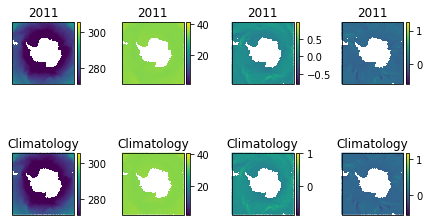

In [5]:
# Plot this on a map 
ds = xr.open_dataset('/g/data/ia40/cice-dirs/runs/waves-10/history/iceh.2000-01-01.nc')
LT = ds['TLAT'].data
LN = ds['TLON'].data

fontprops = fm.FontProperties(size=18)
plt.figure()
clevs=np.arange(0,4,1)

coord_lims = [-180, 180, -50, -90]

# First pane
filename_read=mypath+"output2011.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['sst'][6,:,:]
ax = plt.subplot(2, 4, 1, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['sss'][6,:,:]
ax = plt.subplot(2, 4, 2, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['u'][6,:,:]
ax = plt.subplot(2, 4, 3, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['v'][6,:,:]
ax = plt.subplot(2, 4, 4, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("2011")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 



print("First done")
# Second pane
filename_read=mypath+"output_clim_2010.nc"
ds = xr.open_dataset(filename_read)
plot_data = ds['sst'][6,:,:]
ax = plt.subplot(2, 4, 5, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
#land_50m = cft.NaturalEarthFeature('physical', 'land', '50m',
#                        edgecolor='black', facecolor='gray', linewidth=0.5)
#ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
p = ax.pcolormesh(LN, LT, plot_data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['sss'][6,:,:]
ax = plt.subplot(2, 4, 6, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['u'][6,:,:]
ax = plt.subplot(2, 4, 7, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 

plot_data = ds['v'][6,:,:]
ax = plt.subplot(2, 4, 8, projection=ccrs.SouthPolarStereo())
ax.set_extent(coord_lims, ccrs.PlateCarree())
p = ax.pcolormesh(LN, LT, plot_data.data,
                  transform=ccrs.PlateCarree(),
                  shading='auto')
plt.title("Climatology")
cb = plt.colorbar(p, orientation='vertical', fraction=0.046, pad=0.04, label='') 


savepath = '/home/566/nd0349/notebooks/'
plt.tight_layout()
#plt.savefig(savepath+'kmeans_map_day_200_'+str(year)+'.png', dpi = 300) 

# CAWCR dataset

## 1980s

In [4]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR'

years = range(1981,1990)
onlyfiles = glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=1980))

for year in years:
    print(glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=year)))
    onlyfiles = onlyfiles+glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=year))
onlyfiles.sort()

filename = onlyfiles[1]
print(filename)
ds = xr.open_dataset(filename)
ds

['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1981/YEARLY/ww3_om2_10deg_1981.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1982/YEARLY/ww3_om2_10deg_1982.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1983/YEARLY/ww3_om2_10deg_1983.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1984/YEARLY/ww3_om2_10deg_1984.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1985/YEARLY/ww3_om2_10deg_1985.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1986/YEARLY/ww3_om2_10deg_1986.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1987/YEARLY/ww3_om2_10deg_1987.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1988/YEARLY/ww3_om2_10deg_1988.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1989/YEARLY/ww3_om2_10deg_1989.nc']
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-o

<xarray.Dataset>
Dimensions:  (time: 8760, dim_j: 300, dim_i: 360)
Coordinates:
  * time     (time) datetime64[ns] 1972-01-02T00:59:59.999986560 ... 1973-11-...
    LON      (dim_j, dim_i) float64 ...
    LAT      (dim_j, dim_i) float64 ...
Dimensions without coordinates: dim_j, dim_i
Data variables:
    dir      (time, dim_j, dim_i) float32 ...
    fp       (time, dim_j, dim_i) float32 ...
    hs       (time, dim_j, dim_i) float32 ...
Attributes:
    history:  Wed May 24 19:00:42 2023: ncrcat -O ww3_om2_10deg_198101.nc ww3...
    NCO:      netCDF Operators version 5.0.7 (Homepage = http://nco.sf.net, C...

In [5]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)
dir_array = np.empty(ds['dir'].shape)
fp_array = np.empty(ds['fp'].shape)
hs_array = np.empty(ds['hs'].shape)


for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,8760):
        dir_array[time_lp,:,:] += weighting*ds_temp['dir'][time_lp,:,:]
        fp_array[time_lp,:,:] += weighting*ds_temp['fp'][time_lp,:,:]
        hs_array[time_lp,:,:] += weighting*ds_temp['hs'][time_lp,:,:]

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/1980/YEARLY/ww3_om2_10deg_1980.nc



KeyboardInterrupt



In [7]:
# Write to a file
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/climatology/CAWCR/'
filename_write=mypath+"ww3_om2_10deg_clim_1980.nc"

d_vars = {"dir" : (['time','dim_j','dim_i'],dir_array,
                              {'long_name' :"wave mean direction",
                               'units'     :"degree",
                               '_FillValue':-2e8}), 
          "fp" : (['time','dim_j','dim_i'],fp_array,
                      {'long_name':"wave peak frequency",
                       'units'    :"s-1",
                       '_FillValue':-2e8}),
          "hs" : (['time','dim_j','dim_i'],hs_array,
                      {'long_name':"significant wave height",
                       'units'    :"m",
                       '_FillValue':-2e8}),
         }
coords = {"LON"  : (["dim_j", "dim_i"],ds['LON'].data,{'units':'degrees_east'}),
          "LAT"  : (["dim_j", "dim_i"],ds['LAT'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6-WIM standalone wave option",
         'title'        : "re-gridded CAWCR output for CICE6 standalone wave climatology",
         'source'       : "Durrant et al. (2013), 10.4225/08/523168703DCC5, ",
         'comment'      : "source files found at https://data.csiro.au/collections/#collection/CIcsiro:6616v8/DItrue",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)

## 2010s

In [6]:
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR'

years = range(2011,2020)
onlyfiles = glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=2010))
print(onlyfiles)
for year in years:
    print(glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=year)))
    onlyfiles = onlyfiles+glob.glob("{path}/{years}/YEARLY/ww3_om2_10deg*".format(path=mypath, years=year))
onlyfiles.sort()

filename = onlyfiles[1]
print(filename)
ds = xr.open_dataset(filename)
ds

['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2010/YEARLY/ww3_om2_10deg_2010.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2011/YEARLY/ww3_om2_10deg_2011.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2012/YEARLY/ww3_om2_10deg_2012.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2013/YEARLY/ww3_om2_10deg_2013.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2014/YEARLY/ww3_om2_10deg_2014.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2015/YEARLY/ww3_om2_10deg_2015.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2016/YEARLY/ww3_om2_10deg_2016.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2017/YEARLY/ww3_om2_10deg_2017.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2018/YEARLY/ww3_om2_10deg_2018.nc']
['/g/data/ia40/cice-dirs/input/CICE_data/forcing/access

<xarray.Dataset>
Dimensions:  (time: 8760, dim_j: 300, dim_i: 360)
Coordinates:
  * time     (time) datetime64[ns] 2032-01-01T00:59:59.999986688 ... 2033-11-...
    LON      (dim_j, dim_i) float64 ...
    LAT      (dim_j, dim_i) float64 ...
Dimensions without coordinates: dim_j, dim_i
Data variables:
    dir      (time, dim_j, dim_i) float32 ...
    fp       (time, dim_j, dim_i) float32 ...
    hs       (time, dim_j, dim_i) float32 ...
Attributes:
    history:  Wed May 24 21:25:51 2023: ncrcat -O ww3_om2_10deg_201101.nc ww3...
    NCO:      netCDF Operators version 5.0.7 (Homepage = http://nco.sf.net, C...

In [7]:
# Calculate the climatology 
weighting = 1/len(onlyfiles)
dir_array = np.empty(ds['dir'].shape)
fp_array = np.empty(ds['fp'].shape)
hs_array = np.empty(ds['hs'].shape)


for filename in onlyfiles:
    print(filename)
    ds_temp = xr.open_dataset(filename)
    for time_lp in range(0,8760):
        dir_array[time_lp,:,:] += weighting*ds_temp['dir'][time_lp,:,:]
        fp_array[time_lp,:,:]  += weighting*ds_temp['fp'][time_lp,:,:]
        hs_array[time_lp,:,:]  += weighting*ds_temp['hs'][time_lp,:,:]

/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2010/YEARLY/ww3_om2_10deg_2010.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2011/YEARLY/ww3_om2_10deg_2011.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2012/YEARLY/ww3_om2_10deg_2012.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2013/YEARLY/ww3_om2_10deg_2013.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2014/YEARLY/ww3_om2_10deg_2014.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2015/YEARLY/ww3_om2_10deg_2015.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2016/YEARLY/ww3_om2_10deg_2016.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2017/YEARLY/ww3_om2_10deg_2017.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2018/YEARLY/ww3_om2_10deg_2018.nc
/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/CAWCR/2019/YEARLY/ww3_om2_10de

In [8]:
# Write to a file
mypath = '/g/data/ia40/cice-dirs/input/CICE_data/forcing/access-om2-10/climatology/CAWCR/'
filename_write=mypath+"ww3_om2_10deg_clim_2010.nc"

d_vars = {"dir" : (['time','dim_j','dim_i'],dir_array,
                              {'long_name' :"wave mean direction",
                               'units'     :"degree",
                               '_FillValue':-2e8}), 
          "fp" : (['time','dim_j','dim_i'],fp_array,
                      {'long_name':"wave peak frequency",
                       'units'    :"s-1",
                       '_FillValue':-2e8}),
          "hs" : (['time','dim_j','dim_i'],hs_array,
                      {'long_name':"significant wave height",
                       'units'    :"m",
                       '_FillValue':-2e8}),
         }
coords = {"LON"  : (["dim_j", "dim_i"],ds['LON'].data,{'units':'degrees_east'}),
          "LAT"  : (["dim_j", "dim_i"],ds['LAT'].data,{'units':'degrees_north'}),
          "time" : (["time"],ds['time'].data)}
attrs = {'creation_date': datetime.now().strftime('%Y-%m-%d %H'),
         'conventions'  : "CCSM data model domain description -- for CICE6-WIM standalone wave option",
         'title'        : "re-gridded CAWCR output for CICE6 standalone wave climatology",
         'source'       : "Durrant et al. (2013), 10.4225/08/523168703DCC5, ",
         'comment'      : "source files found at https://data.csiro.au/collections/#collection/CIcsiro:6616v8/DItrue",
         'author'       : 'Noah Day',
         'email'        : 'noah.day@adelaide.edu.au'}
enc_dict  = {'shuffle':True,'zlib':True,'complevel':5} 
JRA_OUT = xr.Dataset(data_vars=d_vars,coords=coords,attrs=attrs)
write_job = JRA_OUT.to_netcdf(filename_write,unlimited_dims=['time'],compute=False)